# PyTorch Computer Vision

In [2]:
# ImportPyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt 


## Getting a dataset

In [3]:
# Setup training data

train_data = datasets.FashionMNIST(
    root="data", # where to data download
    train=True, # do we want to train
    download=True, # do we want to download
    transform=ToTensor(),
    target_transform=None
)

In [4]:
# Setup test data

test_data = datasets.FashionMNIST(
    root="data", # where to data download
    train=False, # do we want to train
    download=True, # do we want to download
    transform=ToTensor(),
    target_transform=None
)

In [5]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
# See the first training example

image, label = train_data[0]

print(image)
print(label)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [8]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [11]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

## Visualizing our data

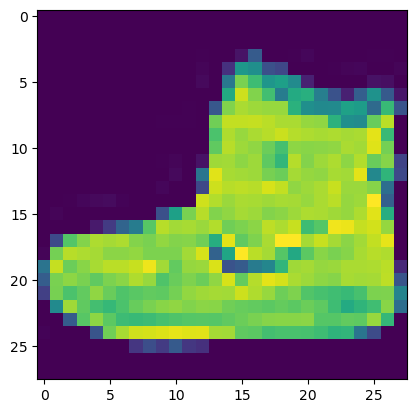

In [12]:
import matplotlib.pyplot as plt 
plt.imshow(image.squeeze())

Text(0.5, 1.0, 'Ankle boot')

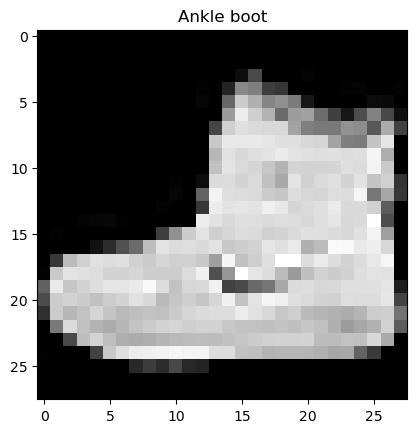

In [13]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

## Prepare DataLoader

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches.

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look at 60000 images in one hit.
2. It gives our NN more chances to update its gradients.

In [14]:
from torch.utils.data import DataLoader

# Setup the batch size
BATCH_SIZE = 32

# Turn datasets into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                       batch_size=BATCH_SIZE,
                       shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f9a455fead0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f9a45640b50>)

In [15]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))

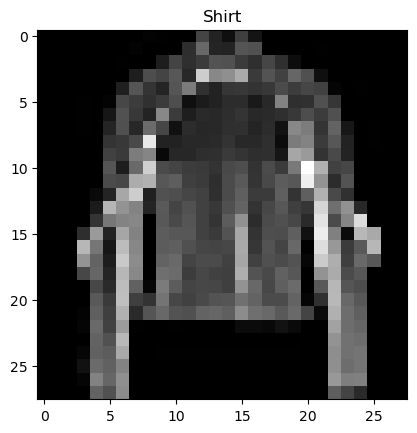

In [16]:
# Show a sample

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.show()

# Buil# Model 0: Build a baseline mode

A baseline mdoel is a simple model you will try and improve upon with subsequent models

In [17]:
# Create a flatten layer

flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [18]:
output = flatten_model(x)
output.shape

torch.Size([1, 784])

In [19]:
from torch import nn 
class FasionMNISTModelV0(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)


In [20]:
torch.manual_seed(42)
model_0 = FasionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FasionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)


tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### Set up loss, optimizer and evaluation matrics

In [22]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.1)

### Creating a function to time to training

In [23]:
from timeit import default_timer as timer 

def print_train_time(
        start:float,
        end:float,
        device: torch.device = None):
    
    total_time = end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### Creating a trainin loop and training a model over batches

In [24]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the time
torch.manual_seed(42)
train_time_start_on_cpu = timer()


# Set the number of epochs
epochs = 3

# Create loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n -----")

    # Training
    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # Forward pass
        y_pred = model_0(X)

        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss +=loss

        # Optimizer zero grad
        optimizer.zero_grad()

        # Backward
        loss.backward()

        # Optimizer step
        optimizer.step()

        if batch % 400 == 0:
            print(f" Looked at: {batch*len(X)} / {len(train_dataloader.dataset)} samples.")
    
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0,0

    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:

            test_pred = model_0(X_test)

            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
        
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    
    print(f" Train Loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}")

train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device = str(next(model_0.parameters())))





        

/home/berkant/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
 -----
 Looked at: 0 / 60000 samples.
 Looked at: 12800 / 60000 samples.
 Looked at: 25600 / 60000 samples.
 Looked at: 38400 / 60000 samples.
 Looked at: 51200 / 60000 samples.


 33%|███▎      | 1/3 [00:08<00:17,  8.84s/it]

 Train Loss: 0.59039 | Test loss: 0.50954, Test Acc: 82.04
Epoch: 1
 -----
 Looked at: 0 / 60000 samples.
 Looked at: 12800 / 60000 samples.
 Looked at: 25600 / 60000 samples.
 Looked at: 38400 / 60000 samples.
 Looked at: 51200 / 60000 samples.


 67%|██████▋   | 2/3 [00:11<00:05,  5.41s/it]

 Train Loss: 0.47633 | Test loss: 0.47989, Test Acc: 83.20
Epoch: 2
 -----
 Looked at: 0 / 60000 samples.
 Looked at: 12800 / 60000 samples.
 Looked at: 25600 / 60000 samples.
 Looked at: 38400 / 60000 samples.
 Looked at: 51200 / 60000 samples.


100%|██████████| 3/3 [00:19<00:00,  6.34s/it]

 Train Loss: 0.45503 | Test loss: 0.47664, Test Acc: 83.43
Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
        [-0.0231,  0.0252,  0.0236,  ..., -0.0892, -0.0385, -0.0071],
        [ 0.0175, -0.0148,  0.0027,  ..., -0.1155, -0.0674,  0.0125]],
       requires_grad=True): 19.007 seconds


## MAke predictions and get results

In [25]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
     ### Testing
    loss, acc = 0,0

    model_0.eval()
    with torch.inference_mode():
        for X,y in data_loader:

            y_pred = model_0(X)

            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))


        loss /= len(test_dataloader)
        acc /= len(test_dataloader)
    
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}


# Calculate model 0 results

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

{'model_name': 'FasionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Device agnostic-code

In [26]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

## Build better model with non-linearity

In [27]:
class FasionMNISTModelV1(nn.Module):
    def __init__(self,in_shape, hidden_layers,out_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=in_shape, out_features=hidden_layers),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layers, out_features=out_shape),
            nn.ReLU()

        )

    def forward(self, x:torch.Tensor):
        return self.layer_stack(x)

In [28]:
model_1 = FasionMNISTModelV1(in_shape=784,
                             hidden_layers=10,
                             out_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### Setup loss, optimizer and evaluation

In [29]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### Functionizing train and eval loops

In [30]:
def train_step(model: torch.nn.Module,
               data_loader: DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    
    train_loss, train_acc = 0, 0

    model.train()

    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)    

        # Forward pass
        y_pred = model(X)

        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss +=loss

        train_acc+= accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Optimizer zero grad
        optimizer.zero_grad()

        # Backward
        loss.backward()

        # Optimizer step
        optimizer.step()

    
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [31]:
def test_step(model: torch.nn.Module,
              data_loader: DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):
    
    ### Testing
    test_loss, test_acc = 0,0

    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            
            X, y = X.to(device), y.to(device)    

            test_pred = model(X)

            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [32]:

torch.manual_seed(42)

# Measure time
train_time_start_on_gpu = timer()

epochs=3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} \n-------")
    train_step(model=model_1, data_loader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn,device=device)
    test_step(model=model_1, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn,device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_gpu, train_time_end_on_gpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
-------
Train loss: 0.98248 | Train acc: 65.06%


 33%|███▎      | 1/3 [00:03<00:07,  3.70s/it]

Test loss: 0.76060 | Test acc: 72.80%
Epoch: 1 
-------
Train loss: 0.70366 | Train acc: 74.48%


 67%|██████▋   | 2/3 [00:07<00:03,  3.68s/it]

Test loss: 0.71731 | Test acc: 73.67%
Epoch: 2 
-------
Train loss: 0.67375 | Train acc: 75.31%


100%|██████████| 3/3 [00:11<00:00,  3.69s/it]

Test loss: 0.69170 | Test acc: 74.81%
Train time on cuda: 11.065 seconds


In [33]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
     ### Testing
    loss, acc = 0,0

    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X , y = X.to(device), y.to(device)
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))


        loss /= len(test_dataloader)
        acc /= len(test_dataloader)
    
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

In [34]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_1_results

{'model_name': 'FasionMNISTModelV1',
 'model_loss': 0.6917039752006531,
 'model_acc': 74.810303514377}

In [35]:
model_0_results

{'model_name': 'FasionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Creating CNN

In [36]:
# Create a convolutional neural network

class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    """
    def __init__(self, input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),

            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),

            nn.ReLU(),

            nn.MaxPool2d(kernel_size=(2,2))


        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2))


        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # there's a trick there
                      out_features=hidden_units),
            

        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)

        return self.classifier(x)
        

In [37]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [38]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [39]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Stepping throusgh nn.Conv2d()

In [40]:
torch.manual_seed(42)

# Create a batch of images

images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [41]:
# Create a single conv2d layer
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       padding=0,
                       stride=1)

conv_output = conv_layer(test_image)
conv_output,conv_output.shape

(tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
          [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
          [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
          ...,
          [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
          [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
          [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],
 
         [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
          [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
          [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
          ...,
          [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
          [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
          [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],
 
         [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
          [ 0.8117,  0.3191,

### Stepping throusgh nn.MaxPool2D()

In [42]:
# print out the original image shape
print(f"Shape of original image: {test_image.shape}")

# Create a nn.MaxPool2d

max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image)
print(f"Shape of conv image: {test_image_through_conv.shape}")

test_image_through_conv_through_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape of maxpool image: {test_image_through_conv_through_max_pool.shape}")



Shape of original image: torch.Size([3, 64, 64])
Shape of conv image: torch.Size([10, 62, 62])
Shape of maxpool image: torch.Size([10, 31, 31])


### Setup a loss function and optimizer

In [43]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [44]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [45]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer 

train_time_start_model_2 = timer()

epoch = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------")

    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_model_2 = timer()
total_train_time = print_train_time(train_time_start_model_2, train_time_end_model_2, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.59257 | Train acc: 78.44%


 33%|███▎      | 1/3 [00:06<00:12,  6.24s/it]

Test loss: 0.38901 | Test acc: 85.89%
Epoch: 1
--------
Train loss: 0.36056 | Train acc: 87.00%


 67%|██████▋   | 2/3 [00:11<00:05,  5.81s/it]

Test loss: 0.35253 | Test acc: 87.06%
Epoch: 2
--------
Train loss: 0.32316 | Train acc: 88.18%


100%|██████████| 3/3 [00:16<00:00,  5.56s/it]

Test loss: 0.32516 | Test acc: 88.25%
Train time on cuda: 16.668 seconds


In [46]:
# Get model_2 results

model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32515594363212585,
 'model_acc': 88.2488019169329}

In [47]:
model_0_results

{'model_name': 'FasionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Make and evaluate random predictions

In [48]:
def make_predictions(model:torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)

            pred_logit = model(sample)

            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)


In [49]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k = 9):
    test_samples.append(sample)
    test_labels.append(label)


# View the first sample shape
test_samples[0].shape


torch.Size([1, 28, 28])

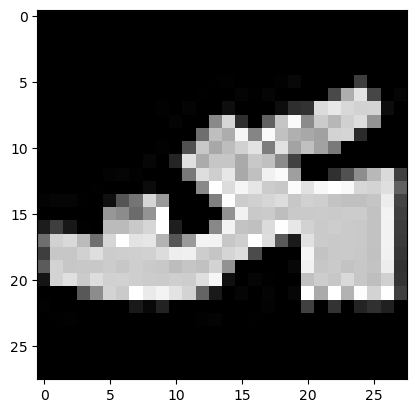

In [50]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")

In [51]:
# Make predictions

pred_probs = make_predictions(model=model_2,
                              data=test_samples)

pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [52]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

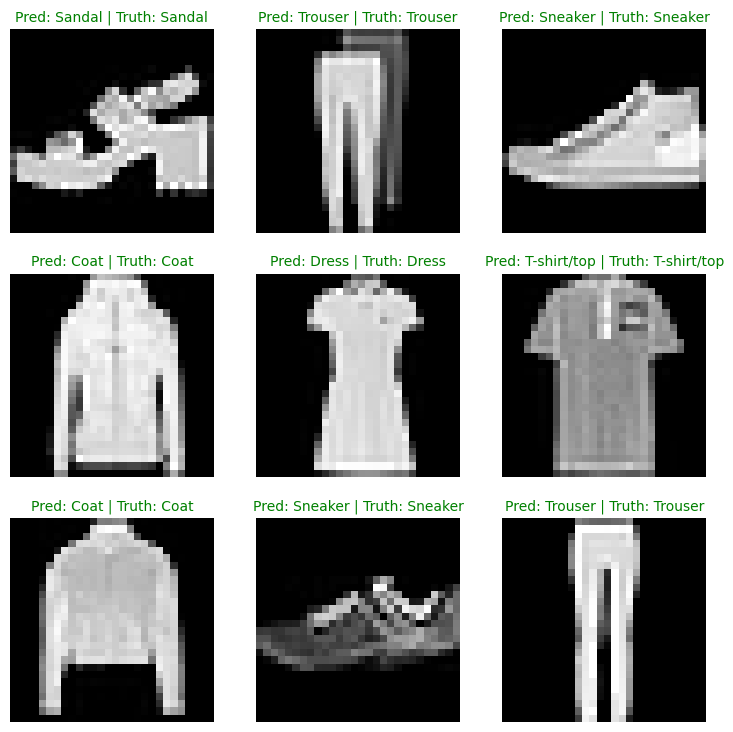

In [53]:
# Plot predictions

plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i,sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)

    plt.imshow(sample.squeeze(dim=0), cmap="gray")

    pred_label = class_names[pred_classes[i]]

    truth_label = class_names[test_labels[i]]

    title_text = f"Pred: {pred_label} | Truth: {truth_label}"


    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False)

In [56]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        X, y = X.to(device), y.to(device)

        y_logit = model_2(X)

        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

        y_preds.append(y_pred.cpu())

#Concatenate
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...: 100%|██████████| 313/313 [00:00<00:00, 819.30it/s]


tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [62]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix


In [64]:
confmat = ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target = test_data.targets)

confmat_tensor

tensor([[614,   4,  51,  68,   9,   1, 244,   0,   9,   0],
        [ 10, 870,   6,  87,  16,   2,   5,   0,   4,   0],
        [  8,   3, 822,  10,  99,   0,  51,   0,   7,   0],
        [ 23,  12,  29, 833,  53,   0,  38,   0,  10,   2],
        [  6,   4, 122,  34, 747,   0,  83,   0,   4,   0],
        [  8,   2,   2,   4,   1, 850,   3,  51,  62,  17],
        [ 68,   5, 136,  57, 103,   1, 618,   0,  12,   0],
        [  1,   1,   0,   0,   0,  28,   0, 928,   5,  37],
        [ 11,   2,  34,  14,  12,   7,  20,   7, 892,   1],
        [  0,   0,   1,   2,   0,  25,   3, 110,   8, 851]])

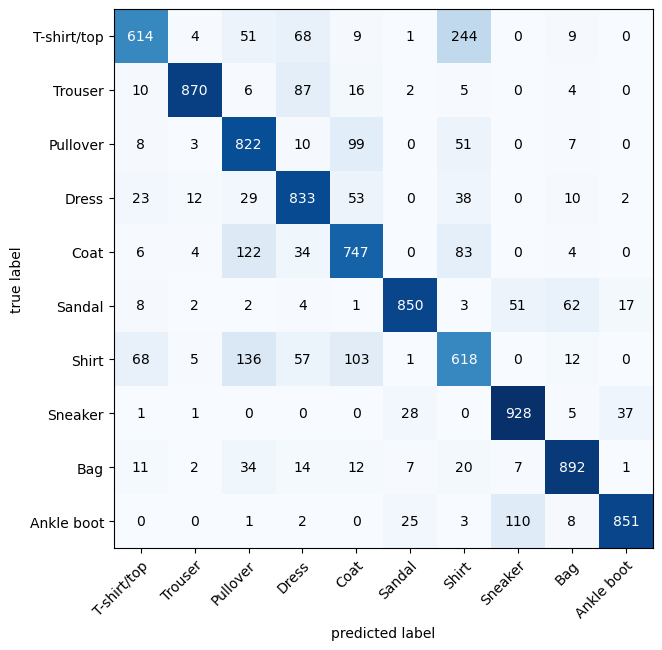

In [65]:
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)